In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('loan_test.csv')

df['effective_date'] = pd.to_datetime(df['effective_date'])
df['due_date'] = pd.to_datetime(df['due_date'])
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)


Feature = df[['Principal','terms','age','Gender']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0


In [3]:
X = Feature
X[0:5]
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [4]:
def A():
    X= preprocessing.StandardScaler().fit(X).transform(X)
    X[0:5]
    return self.partial_fit(X,y)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [6]:
from sklearn.metrics import classification_report,confusion_matrix
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [7]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))
    

Text(0, 0.5, 'Error Rate')

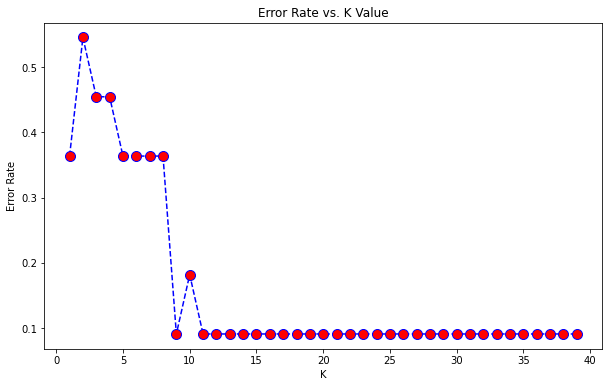

In [8]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
classification = dc.fit(X_train,y_train)
prediction = dc.predict(X_test)
prediction

array(['PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF'], dtype=object)

In [10]:
print('Confusion_Matrix :\n')

print(confusion_matrix(prediction,y_test))

print('Report :\n')

print(classification_report(prediction,y_test))

print('Accuracy :\n')
metrics.accuracy_score(prediction,y_test)

Confusion_Matrix :

[[0 3]
 [1 7]]
Report :

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00         3
     PAIDOFF       0.70      0.88      0.78         8

    accuracy                           0.64        11
   macro avg       0.35      0.44      0.39        11
weighted avg       0.51      0.64      0.57        11

Accuracy :



0.6363636363636364

# Support Vector Machine


In [11]:
from sklearn import svm
svc = svm.SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
y_pred

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [12]:
metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
set(y_test) - set(y_pred)
print('Classification:\n')
print(metrics.classification_report(y_pred,y_test))
metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

print('Confusion_Matrix :\n')
print(metrics.confusion_matrix(y_pred,y_test))

print('Accuracy :\n')
print(metrics.accuracy_score(y_pred,y_test))

Classification:

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00         0
     PAIDOFF       1.00      0.91      0.95        11

    accuracy                           0.91        11
   macro avg       0.50      0.45      0.48        11
weighted avg       1.00      0.91      0.95        11

Confusion_Matrix :

[[ 0  0]
 [ 1 10]]
Accuracy :

0.9090909090909091


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression¶



In [13]:
from sklearn.linear_model import LogisticRegression
linear = LogisticRegression(fit_intercept=True,max_iter=1000 )
linear.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [14]:
y_pred = linear.predict(X_test)
y_pred

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [15]:
metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
set(y_test) - set(y_pred)
print('Classification_report :\n');
print(metrics.classification_report(y_pred,y_test))
metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

CLASSIFICATION_REPORT :

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00         0
     PAIDOFF       1.00      0.91      0.95        11

    accuracy                           0.91        11
   macro avg       0.50      0.45      0.48        11
weighted avg       1.00      0.91      0.95        11



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9523809523809523

In [16]:
print('Confution_matrix :\n');
print(metrics.confusion_matrix(y_pred,y_test))

Confution_matrix :

[[ 0  0]
 [ 1 10]]


In [17]:
print('Accuracy_scoure :\n');
print(metrics.accuracy_score(y_pred,y_test))

Accuracy_scoure :

0.9090909090909091


In [18]:
from sklearn.metrics import cohen_kappa_score, jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn.metrics' (C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [19]:
from sklearn.metrics import cohen_kappa_score 
jaccard_similarity_score

NameError: name 'jaccard_similarity_score' is not defined